#### Assignment 6: EDA for the iris dataset

##### Name: Steven Fernandez | Date: July 12, 2021 | Course: 4045-002, COP 4045-001: Python Programming 

In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

###### Functions

In [2]:
def mean(x): # This function computes the mean of each attribute
    s= sum(x)
    a= s/len(x)
    return a

def SD(x): # This function computes the standard deviation of each attribute
    s=[]
    for i in x:
        s.append(pow(i-mean(x),2))
    sd= pow((sum(s)/len(x)),0.5)
    return sd
        
        
def printtable(dic): #This function handles the "pretty" printing for dictionaries
    a=tabulate(dic, headers="keys",tablefmt="rst", colalign=("left"))
    print(a)
    
    
def normalize(x): #This function normalizes the values of each attribute
    nz=[]
    mini= min(x)
    maxi= max(x)
    for i in x:
        calc= (i-mini)/(maxi-mini)
        nz.append(calc)
    return nz

##### 1. Reading the data from the iris.csv file.

In [3]:
SL= []
SW= []
PL=[]
PW=[]

with open('iris.csv', newline='') as csvfile: #this part of the code gets de values of each attribute in the dataset
    reader = csv.DictReader(csvfile)
    for row in reader:
        SL.append(float(row['sepal_length']))
        SW.append(float(row['sepal_width']))
        PL.append(float(row['petal_length']))
        PW.append(float(row['petal_width']))

#####  2. Creating suitable data structures and algorithms for storing each of the four attributes/features (petal length, petal width, sepal length, and sepal width) for each data point and computing the minimum, maximum, mean, and standard deviation of each attribute for each species.

In [4]:
#here, we create a dictionary to sort the features while computing the statistics using the functions we created above
dic= {}
dic= {'Statistics ': ['Count:','Minimum:','Maximum:', 'Mean:', 'Standard Deviation:'],
      'Sepal Length': [len(SL), min(SL), max(SL), mean(SL), SD(SL)], 
      'Sepal Width':  [len(SW), min(SW), max(SW), mean(SW), SD(SW)], 
      'Petal Length': [len(PL), min(PL), max(PL), mean(PL), SD(PL)],
      'Petal Width':  [len(PW), min(PW), max(PW), mean(PW), SD(PW)]}
printtable(dic)

===================  ==============  =============  ==============  =============
        Statistics     Sepal Length    Sepal Width    Petal Length    Petal Width
===================  ==============  =============  ==============  =============
Count:               150             150            150                150
Minimum:             4.3             2              1                    0.1
Maximum:             7.9             4.4            6.9                  2.5
Mean:                5.84333         3.054          3.75867              1.19867
Standard Deviation:  0.825301        0.432147       1.75853              0.760613
===================  ==============  =============  ==============  =============


##### 3. Plotting meaningful scatter plots of the data, two features at a time. Do this at least for sepal width vs. sepal length and petal width vs. petal length.

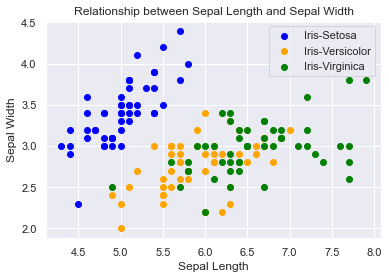

In [48]:
plt.scatter(SL[:50], SW[:50], color='blue', label='Iris-Setosa')
plt.scatter(SL[50:100], SW[50:100], color='orange', label='Iris-Versicolor')
plt.scatter(SL[100:500], SW[100:150], color='green', label='Iris-Virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("Relationship between Sepal Length and Sepal Width")
plt.grid("on")
plt.show()

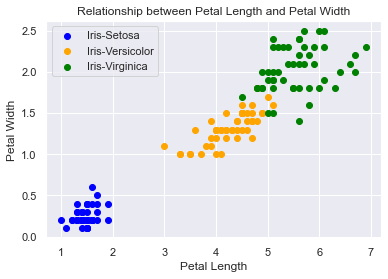

In [46]:
plt.scatter(PL[:50], PW[:50], color='blue', label='Iris-Setosa')
plt.scatter(PL[50:100], PW[50:100], color='orange', label='Iris-Versicolor')
plt.scatter(PL[100:500], PW[100:150], color='green', label='Iris-Virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Relationship between Petal Length and Petal Width")
plt.grid("on")
plt.show()

##### 4. Normalizing the data, adjusting each feature in the same way across all examples. In this case, we want to limit the range of each feature to the [0..1] interval.

In [7]:
#Here, we create a normalize dictionary using the same data and the same functions created above
dic_norm= {}
dic_norm= {'Statistics ': ['Minimum:','Maximum:', 'Mean:'],
           'Sepal Length': [min(normalize(SL)), max(normalize(SL)), mean(normalize(SL))], 
           'Sepal Width':  [min(normalize(SW)), max(normalize(SW)), mean(normalize(SW))], 
           'Petal Length': [min(normalize(PL)), max(normalize(PL)), mean(normalize(PL))],
           'Petal Width':  [min(normalize(PW)), max(normalize(PW)), mean(normalize(PW))]}
print("Iris Normalized")
printtable(dic_norm)

Iris Normalized
=============  ==============  =============  ==============  =============
  Statistics     Sepal Length    Sepal Width    Petal Length    Petal Width
=============  ==============  =============  ==============  =============
Minimum:       0               0              0                    0
Maximum:       1               1              1                    1
Mean:          0.428704        0.439167       0.467571             0.457778
=============  ==============  =============  ==============  =============


###### 5. (OPTIONAL, 5% bonus) Plotting the histograms for the features and their correlations in a single plot.

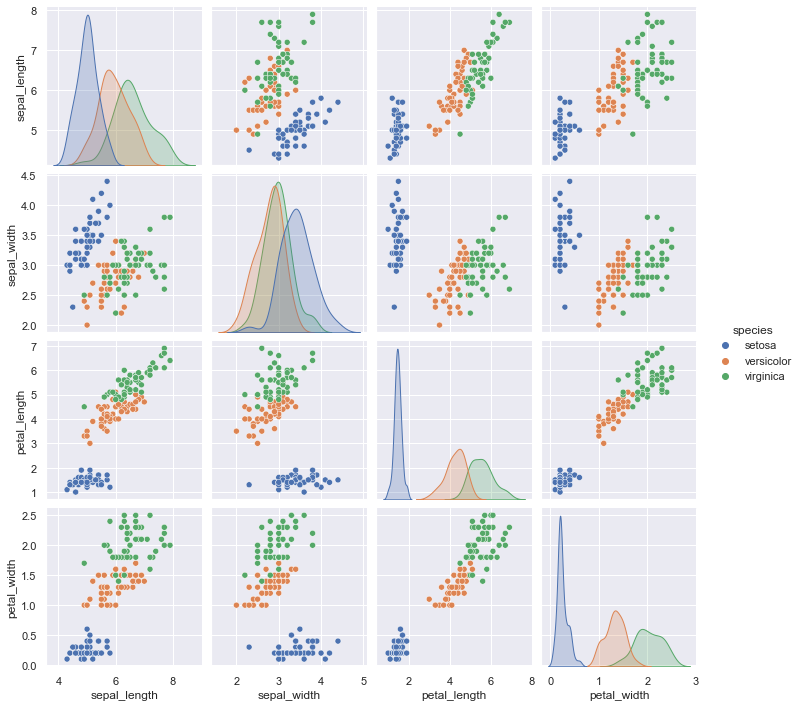

In [36]:
#using seaborn-pairplot to plot the histogram and scatterplot of the whole dataset
iris_plot= sns.load_dataset("iris")
sns.pairplot(iris_plot,hue="species")

###### 6. Using the petal length and petal width as features/attributes, (manually) building a decision tree classifier (essentially a series of if-elif-else statements in the proper sequence with sensible thresholds for each decision/node).

In [61]:
#Based on the values of the PETAL LENGTH and PETAL WIDTH, we built a decision tree to predict the target. 
#It computes how many times the DECISION TREE predicted a target, and also created a list that stores all the predictions.

c1=0
c2=0
c3=0

prediction= []
for i in range(len(PL)):
    if PL[i]<3:
        c1=c1+1
        prediction.append("S")
    elif(PW[i]<1.8):
        c2=c2+1
        prediction.append("VE")
    else:
        c3=c3+1
        prediction.append("VI")
                
print("Prediction based on Petal Length and Petal Width:\n",prediction)  
print("It's IRIS-SETOSA [S]: ",c1)
print("It's IRIS-VERSICOLOR [VE]: ",c2)
print("It's IRIS-VIRGINICA: [VI]",c3)

Prediction based on Petal Length and Petal Width:
 ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VI', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VE', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VE', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VE', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VE', 'VI', 'VI', 'VI', 'VE', 'VE', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI']
It's IRIS-SETOSA [S]:  50
It's IRIS-VERSICOLOR [VE]:  54
It's IRIS-VIRGINICA: [VI] 46


### Conclusion

##### -It's important to normalize the data because it gets rid of anomalies that can make analysis of the dataset more complicated.
###### -Scatter plots are really meaningful to analize the values stored in the dataset because it lets you observe how the attributes are related to each other.
###### - Pairplot (item 5) let you know how the data are distributed in the dataset and how they are related to each other.
###### -Taking a look to the scatter plots, you can conclude that its easier to predict a Iris-Setosa because based on the attributes it differs more from the other two.
##### -Based on the scatter plot Petal Length vs Petal Width, we selected the best treshold values to build the decision tree.
##### - The decision tree tend to confuse between Iris-Versicolor and Iris-Virginica because there is less variance in its values compared to Iris-Setosa.